### Generate Data

In [85]:
import numpy as np

# Hyper parameters
n = 200
tol = 5e-6
max_iters = int(1e4)
p = 10
beta_true = [-1, 1, -1, 1, -1, 1, -1, 1, -1, 1]

### 1. Task One

In [86]:
x = []
y = []

for i in range(n):
    x_element = ([1]+list(np.random.normal(size=p-1)))
    x.append(x_element)

    y_element = np.exp(np.dot(x[i], beta_true))/(1 + np.exp(np.dot(x[i], beta_true)))
    y_element = np.random.binomial(1, y_element)
    y.append(y_element)

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(200, 10)
(200,)


In [111]:
def Gradient_Descent(x, y, lr, p ,iterations, tol):  # c = lr (learning rate)
    # initial value of beta^0
    beta = np.zeros(10)

    loss_norm = []
    new_beta = []
    for j in range(iterations):
        gradient = np.zeros(p)
        for i in range(len(x)):
            first_term = -np.dot(y[i], x[i])
            common_factor = np.exp(np.dot(x[i], beta))
            second_term = np.dot( (common_factor)/(1 + common_factor),
                                  x[i])
            element = first_term + second_term
            gradient += element
        beta = beta - lr * (1/n) * (gradient)
        new_beta.append(beta)
        loss_norm.append(np.linalg.norm(gradient/n))

        # early stopping
        if np.linalg.norm(gradient/n) < tol:
            print(f' Early Stopping at iterations: {j}')
            return beta, np.array(new_beta), np.array(loss_norm)

    return beta, np.array(new_beta), np.array(loss_norm)

In [ ]:
lr1_beta, lr1_new_beta, lr1_loss_norm = Gradient_Descent(x, y, 1, p, max_iters, tol)
lr05_beta, lr05_new_beta, lr05_loss_norm = Gradient_Descent(x, y, 5e-1, p, max_iters, tol)
lr01_beta, lr01_new_beta, lr01_loss_norm = Gradient_Descent(x, y, 1e-1, p, max_iters, tol)
lr005_beta, lr005_new_beta, lr005_loss_norm = Gradient_Descent(x, y, 5e-2, p, max_iters, tol)
lr001_beta, lr001_new_beta, lr001_loss_norm = Gradient_Descent(x, y, 1e-2, p, max_iters, tol)


### Task Two

In [109]:
def loss_f(x, y, beta):
    loss = 0
    for i in range(len(x)):
        first_term = -y[i]*np.dot(x[i], beta)
        second_term = np.log(1 + np.exp(np.dot(x[i], beta)))
        element = first_term + second_term

    loss += element
    return np.array(loss)

def Differentiation(beta, new_beta, iterations):
    diff = []
    loss = loss_f(x, y, beta)
    for i in range(len(new_beta)):
        diff.append(loss_f(x, y, new_beta[i] - loss))
    return diff

In [ ]:
lr1_diff = Differentiation(lr1_beta, lr1_new_beta, max_iters)
lr05_diff = Differentiation(lr05_beta, lr05_new_beta, max_iters)
lr01_diff = Differentiation(lr01_beta, lr01_new_beta, max_iters)
lr005_diff = Differentiation(lr005_beta, lr005_new_beta, max_iters)
lr001_diff = Differentiation(lr001_beta, lr001_new_beta, max_iters)

### Plot

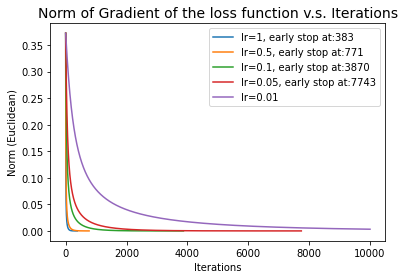

In [112]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(lr1_new_beta))), lr1_loss_norm, label = f"lr=1, early stop at:{len(lr1_loss_norm)}")
plt.plot(list(range(len(lr05_new_beta))), lr05_loss_norm, label = f"lr=0.5, early stop at:{len(lr05_loss_norm)}")
plt.plot(list(range(len(lr01_new_beta))), lr01_loss_norm, label = f"lr=0.1, early stop at:{len(lr01_loss_norm)}")
plt.plot(list(range(len(lr005_new_beta))), lr005_loss_norm, label = f"lr=0.05, early stop at:{len(lr005_loss_norm)}")
plt.plot(list(range(len(lr001_new_beta))), lr001_loss_norm, label = "lr=0.01")
plt.legend()

plt.title("Norm of Gradient of the loss function v.s. Iterations", fontsize = 14)
plt.xlabel("Iterations")
plt.ylabel("Norm (Euclidean)")
plt.yscale("linear")
plt.show()

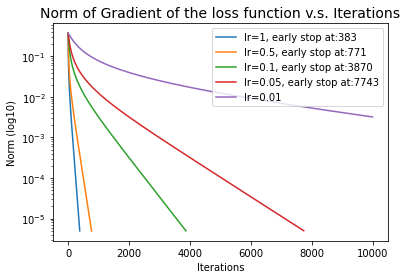

In [113]:
plt.plot(list(range(len(lr1_new_beta))), lr1_loss_norm, label = f"lr=1, early stop at:{len(lr1_loss_norm)}")
plt.plot(list(range(len(lr05_new_beta))), lr05_loss_norm, label = f"lr=0.5, early stop at:{len(lr05_loss_norm)}")
plt.plot(list(range(len(lr01_new_beta))), lr01_loss_norm, label = f"lr=0.1, early stop at:{len(lr01_loss_norm)}")
plt.plot(list(range(len(lr005_new_beta))), lr005_loss_norm, label = f"lr=0.05, early stop at:{len(lr005_loss_norm)}")
plt.plot(list(range(len(lr001_new_beta))), lr001_loss_norm, label = "lr=0.01")
plt.legend()

plt.title("Norm of Gradient of the loss function v.s. Iterations", fontsize = 14)
plt.xlabel("Iterations")
plt.ylabel("Norm (log10)")
plt.yscale("log")
plt.show()

In [91]:
print(lr1_diff[-1])

16454.88502592758


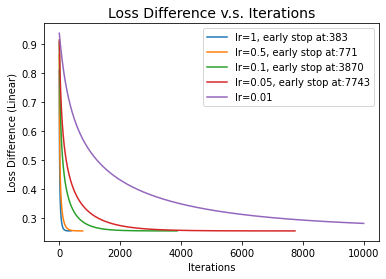

In [114]:
plt.plot(list(range(len(lr1_new_beta))), lr1_diff, label = f"lr=1, early stop at:{len(lr1_new_beta)}")
plt.plot(list(range(len(lr05_new_beta))), lr05_diff, label = f"lr=0.5, early stop at:{len(lr05_new_beta)}")
plt.plot(list(range(len(lr01_new_beta))), lr01_diff, label = f"lr=0.1, early stop at:{len(lr01_new_beta)}")
plt.plot(list(range(len(lr005_new_beta))), lr005_diff, label = f"lr=0.05, early stop at:{len(lr005_new_beta)}")
plt.plot(list(range(len(lr001_new_beta))), lr001_diff, label = "lr=0.01")
plt.legend()

plt.title("Loss Difference v.s. Iterations", fontsize = 14)
plt.xlabel("Iterations")
plt.ylabel("Loss Difference (Linear)")
plt.yscale("linear")
plt.show()

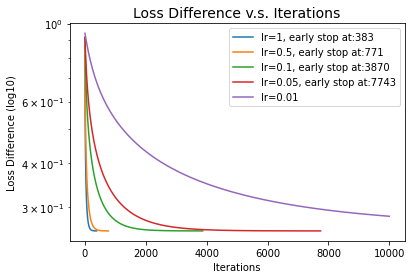

In [115]:
plt.plot(list(range(len(lr1_new_beta))), lr1_diff, label = f"lr=1, early stop at:{len(lr1_new_beta)}")
plt.plot(list(range(len(lr05_new_beta))), lr05_diff, label = f"lr=0.5, early stop at:{len(lr05_new_beta)}")
plt.plot(list(range(len(lr01_new_beta))), lr01_diff, label = f"lr=0.1, early stop at:{len(lr01_new_beta)}")
plt.plot(list(range(len(lr005_new_beta))), lr005_diff, label = f"lr=0.05, early stop at:{len(lr005_new_beta)}")
plt.plot(list(range(len(lr001_new_beta))), lr001_diff, label = "lr=0.01")
plt.legend()

plt.title("Loss Difference v.s. Iterations", fontsize = 14)
plt.xlabel("Iterations")
plt.ylabel("Loss Difference (log10)")
plt.yscale("log")
plt.show()
